In [1]:
import pandas as pd

tips = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/tips.csv",
    dtype={
        "sex": "category",
        "smoker": "category",
        "day": "category",
        "time": "category",
    },
)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
# GroupByオブジェクト
tips_groupby_time = tips.groupby("time", observed=True)
tips_groupby_time

In [5]:
type(tips_groupby_time)

pandas.core.groupby.generic.DataFrameGroupBy

In [8]:
total_bill_groupby_time = tips.loc[:, "total_bill"].groupby(
    tips.loc[:, "time"], observed=True,
)
type(total_bill_groupby_time)

pandas.core.groupby.generic.SeriesGroupBy

In [10]:
tips_groupby_day_time = tips.groupby(["day", "time"], observed=True)
type(tips_groupby_day_time)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
tips_groupby_time.get_group("Dinner").head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips_groupby_time.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2


In [14]:
tips_groupby_time.tail(3)

,total_bill,tip,sex,smoker,day,time,size
224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [15]:
tips_groupby_time.nth(5)

,total_bill,tip,sex,smoker,day,time,size
5,25.29,4.71,Male,No,Sun,Dinner,4
82,10.07,1.83,Female,No,Thur,Lunch,1


In [18]:
tips_groupby_day_time.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
220,12.16,2.20,Male,Yes,Fri,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2


In [25]:
tips_groupby_day_time.get_group("Fri").head()

ValueError: must supply a tuple to get_group with multiple grouping keys

In [29]:
tips_groupby_day_time.get_group(("Fri", "")).head()

KeyError: ('Fri', '')

In [23]:
tips_groupby_day_time.get_group(("Fri", "Dinner")).head()

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


In [27]:
tips_groupby_day_time.get_group(("Thur", "Lunch")).head()

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2


## GroupByオブジェクトの代表的な集約メソッド
<table>
    <thead>
        <tr>
            <th>メソッド</th>
            <th>機能概要</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><m-b>mean()</m-b></td>
            <td>平均</td>
        </tr>
        <tr>
            <td><m-b>sum()</m-b></td>
            <td>合計</td>
        </tr>
        <tr>
            <td><m-b>size()</m-b></td>
            <td>要素数</td>
        </tr>
        <tr>
            <td><m-b>count()</m-b></td>
            <td>欠損値を除いた要素数</td>
        </tr>
        <tr>
            <td><m-b>nunique()</m-b></td>
            <td>一意の要素数</td>
        </tr>
        <tr>
            <td><m-b>std()</m-b></td>
            <td>標準偏差</td>
        </tr>
        <tr>
            <td><m-b>var()</m-b></td>
            <td>分散</td>
        </tr>
        <tr>
            <td><m-b>sem()</m-b></td>
            <td>標準誤差</td>
        </tr>
        <tr>
            <td><m-b>describe()</m-b></td>
            <td>要約統計量</td>
        </tr>
        <tr>
            <td><m-b>first()</m-b></td>
            <td>最初の要素</td>
        </tr>
        <tr>
            <td><m-b>last()</m-b></td>
            <td>最後の要素</td>
        </tr>
        <tr>
            <td><m-b>nth()</m-b></td>
            <td>n番目の要素</td>
        </tr>
        <tr>
            <td><m-b>min()</m-b></td>
            <td>最小値</td>
        </tr>
        <tr>
            <td><m-b>max()</m-b></td>
            <td>最大値</td>
        </tr>
    </tbody>
</table>

In [30]:
tips_groupby_time.sum(numeric_only=True)

,total_bill,tip,size
time,,,
Dinner,3660.30,546.07,463
Lunch,1167.47,185.51,164


In [31]:
tips_groupby_time.sum(numeric_only=False)

TypeError: category type does not support sum operations

In [33]:
tips_groupby_time[["tip", "total_bill"]].mean()

,tip,total_bill
time,,
Dinner,3.102670,20.797159
Lunch,2.728088,17.168676


In [34]:
tips_groupby_time.describe()

total_bill                                                              \
            count       mean       std   min      25%     50%      75%    max   
time                                                                            
Dinner      176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81   
Lunch        68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11   

          tip            ...                 size                           \
        count      mean  ...     75%   max  count      mean       std  min   
time                     ...                                                 
Dinner  176.0  3.102670  ...  3.6875  10.0  176.0  2.630682  0.910241  1.0   
Lunch    68.0  2.728088  ...  3.2875   6.7   68.0  2.411765  1.040024  1.0   

                            
        25%  50%  75%  max  
time                        
Dinner  2.0  2.0  3.0  6.0  
Lunch   2.0  2.0  2.0  6.0  

[2 rows x 24 columns]

In [35]:
tips_groupby_time[["total_bill"]].describe()

total_bill                                                            
            count       mean       std   min      25%     50%      75%    max
time                                                                         
Dinner      176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81
Lunch        68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11

In [37]:
tips_groupby_time["tip"].aggregate(["sum", "mean"])

,sum,mean
time,,
Dinner,546.07,3.102670
Lunch,185.51,2.728088


In [39]:
tips_groupby_time[["tip", "size"]].agg(["sum", "mean"])

tip           size          
           sum      mean  sum      mean
time                                   
Dinner  546.07  3.102670  463  2.630682
Lunch   185.51  2.728088  164  2.411765

In [49]:
def max_squared(x):
    return x.max() ** 2

tips_groupby_time["tip"].aggregate(["max", max_squared])

,max,max_squared
time,,
Dinner,10.0,100.00
Lunch,6.7,44.89


In [50]:
tips_groupby_time.agg({"tip": "count", "total_bill": "nunique"})

,tip,total_bill
time,,
Dinner,176,168
Lunch,68,64


In [51]:
tips_groupby_time["tip"].apply(max_squared)

time
Dinner    100.00
Lunch      44.89
Name: tip, dtype: float64

In [52]:
tips_groupby_time[["tip", "size"]].apply(max_squared)

,tip,size
time,,
Dinner,100.00,36.0
Lunch,44.89,36.0


In [55]:
def min_max_ser(x):
    return pd.Series(
        [x.min(), x.max()],
        index=["min", "max"],
    )

tips_groupby_time["tip"].apply(min_max_ser)

time       
Dinner  min     1.00
        max    10.00
Lunch   min     1.25
        max     6.70
Name: tip, dtype: float64

In [56]:
tips_groupby_time[["tip", "size"]].apply(min_max_ser)

,min,max
time,,
Dinner,tip 1.0 size 1.0 dtype: float64,tip 10.0 size 6.0 dtype: float64
Lunch,tip 1.25 size 1.00 dtype: float64,tip 6.7 size 6.0 dtype: float64


In [58]:
# フィルタリング
over3 = tips.groupby("day", observed=True).filter(lambda x: x["tip"].mean() > 3)
over3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
over3.loc[:, "day"].unique()

['Sun']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']

Dinner         Axes(0.1,0.15;0.363636x0.75)
Lunch     Axes(0.536364,0.15;0.363636x0.75)
dtype: object

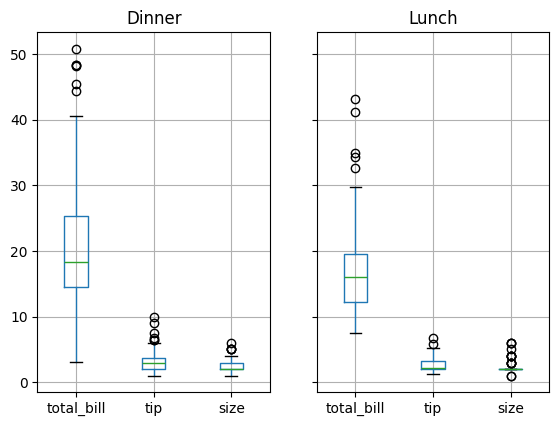

In [61]:
# 可視化
tips.groupby("time", observed=True).boxplot()

Fri          Axes(0.1,0.559091;0.363636x0.340909)
Sat     Axes(0.536364,0.559091;0.363636x0.340909)
Sun              Axes(0.1,0.15;0.363636x0.340909)
Thur        Axes(0.536364,0.15;0.363636x0.340909)
dtype: object

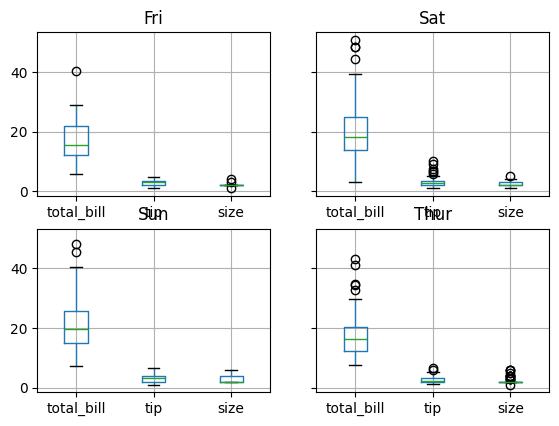

In [62]:
tips.groupby("day", observed=True).boxplot()